In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the two uploaded datasets
df1 = pd.read_csv('SMS.csv')           # Assumed to have: Label, text
df2 = pd.read_csv('Dataset_5971.csv')  # Assumed to have: Label, text, url, email, phone

In [ ]:
df1.head(), df2.head()

(   Label                                               Text
 0    ham  Go until jurong point, crazy.. Available only ...
 1    ham                      Ok lar... Joking wif u oni...
 2  smish  Free entry in 2 a wkly comp to win FA Cup fina...
 3    ham  U dun say so early hor... U c already then say...
 4    ham  Nah I don't think he goes to usf, he lives aro...,
       LABEL                                               TEXT URL EMAIL PHONE
 0       ham  Your opinion about me? 1. Over 2. Jada 3. Kusr...  No    No    No
 1       ham  What's up? Do you want me to come online? If y...  No    No    No
 2       ham                       So u workin overtime nigpun?  No    No    No
 3       ham  Also sir, i sent you an email about how to log...  No    No    No
 4  Smishing  Please Stay At Home. To encourage the notion o...  No    No    No)

In [ ]:
import pandas as pd

# Step 0: Standardize column names
# df1.columns = ['Label', 'Text'] # This line is no longer needed as columns are added later
df2.columns = ['Label', 'Text', 'url', 'email', 'phone']

# Step 1: Remove all rows labeled 'Spam' in df2
df2 = df2[df2['Label'].str.lower() != 'spam']  # Case-insensitive removal

# Step 2: Normalize labels in both datasets
df1['Label'] = df1['Label'].str.capitalize()
df2['Label'] = df2['Label'].str.capitalize()

# Step 3: Add missing columns to df1 with default value 'No'
df1['url'] = 'No'
df1['email'] = 'No'
df1['phone'] = 'No'

# Step 4: Reorder columns to match
df1 = df1[['Label', 'Text', 'url', 'email', 'phone']]
df2 = df2[['Label', 'Text', 'url', 'email', 'phone']]

# Step 5: Concatenate the datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Step 6: Normalize label variants
label_mapping = {
    'ham': 'Ham',
    'Ham': 'Ham',
    'smish': 'Smishing',
    'Smish': 'Smishing',
    'smishing': 'Smishing',
    'Smishing': 'Smishing'
}
combined_df['Label'] = combined_df['Label'].map(label_mapping)

# Step 7: Final label distribution and preview
print(combined_df['Label'].value_counts())
print(combined_df.head())

Label
Ham         9669
Smishing    1385
Name: count, dtype: int64
      Label                                               Text url email phone
0       Ham  Go until jurong point, crazy.. Available only ...  No    No    No
1       Ham                      Ok lar... Joking wif u oni...  No    No    No
2  Smishing  Free entry in 2 a wkly comp to win FA Cup fina...  No    No    No
3       Ham  U dun say so early hor... U c already then say...  No    No    No
4       Ham  Nah I don't think he goes to usf, he lives aro...  No    No    No


In [ ]:
if 'email' in combined_df.columns:
    combined_df = combined_df.drop(columns=['email'])
else:
    print("Warning: 'email' column not found. It may have been dropped in a previous step.")

In [ ]:
df = combined_df

In [ ]:
df.sample(5)

,Label,Text,url,phone
8148,Ham,I told your number to gautham..,No,No
2084,Ham,"you are sweet as well, princess. Please tell m...",No,No
4391,Ham,Do you know why god created gap between your f...,No,No
1081,Ham,You tell what happen dont behave like this to ...,No,No
10527,Ham,Hey leave it. not a big deal:-) take care.,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   11054 non-null  object
 1   Text    11054 non-null  object
 2   url     11054 non-null  object
 3   phone   11054 non-null  object
dtypes: object(4)
memory usage: 345.6+ KB


In [ ]:
df.head(8)

,Label,Text,url,phone
0,Ham,"Go until jurong point, crazy.. Available only ...",No,No
1,Ham,Ok lar... Joking wif u oni...,No,No
2,Smishing,Free entry in 2 a wkly comp to win FA Cup fina...,No,No
3,Ham,U dun say so early hor... U c already then say...,No,No
4,Ham,"Nah I don't think he goes to usf, he lives aro...",No,No
5,Smishing,FreeMsg Hey there darling it's been 3 week's n...,No,No
6,Ham,Even my brother is not like to speak with me. ...,No,No
7,Ham,As per your request 'Melle Melle (Oru Minnamin...,No,No


In [ ]:
df.rename(columns={'Label':'target','Text':'text'},inplace=True)
df.sample(5)

,target,text,url,phone
5758,Smishing,U have a secret admirer who is looking 2 make ...,No,yes
9248,Ham,Yes fine,No,No
10456,Ham,Anything lor if they all go then i go lor...,No,No
788,Smishing,Ever thought about living a good life with a p...,No,No
1293,Ham,Da my birthdate in certificate is in april but...,No,No


In [ ]:
print(df['target'].unique())

['Ham' 'Smishing']


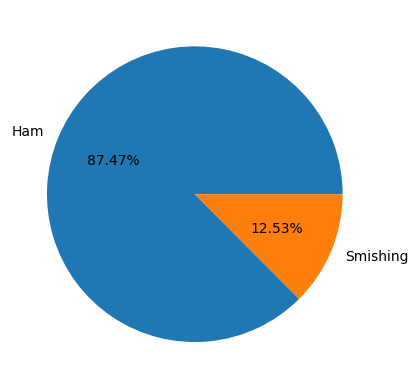

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['Ham', 'Smishing'], autopct = "%.2f%%")
plt.show()

In [ ]:
df.isnull().sum()

,0
target,0
text,0
url,0
phone,0


In [ ]:
df.duplicated().sum()

np.int64(4467)

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

      target                                               text url phone
103      Ham  As per your request 'Melle Melle (Oru Minnamin...  No    No
154      Ham  As per your request 'Melle Melle (Oru Minnamin...  No    No
207      Ham  As I entered my cabin my PA said, '' Happy B'd...  No    No
223      Ham                             Sorry, I'll call later  No    No
326      Ham                   No calls..messages..missed calls  No    No
...      ...                                                ...  ..   ...
11049    Ham                           :( but your not here....  No    No
11050    Ham  Becoz its  &lt;#&gt;  jan whn al the post ofic...  No    No
11051    Ham  Its a valentine game. . . send dis msg to all ...  No    No
11052    Ham                              We r outside already.  No    No
11053    Ham  The Xmas story is peace.. The Xmas msg is love...  No    No

[4467 rows x 4 columns]


In [ ]:
df.drop_duplicates(keep='first')

,target,text,url,phone
0,Ham,"Go until jurong point, crazy.. Available only ...",No,No
1,Ham,Ok lar... Joking wif u oni...,No,No
2,Smishing,Free entry in 2 a wkly comp to win FA Cup fina...,No,No
3,Ham,U dun say so early hor... U c already then say...,No,No
4,Ham,"Nah I don't think he goes to usf, he lives aro...",No,No
...,...,...,...,...
11029,Smishing,Records indicate you were involved in an accid...,No,No
11036,Ham,"As I entered my cabin my PA said, '' Happy B'd...",No,No
11043,Ham,Yes :)it is completely in out of form:),No,No
11045,Ham,Kay... Since we are out already,No,No


In [ ]:
df.shape

(11054, 4)

In [ ]:
df['target'].value_counts()

,count
target,
Ham,9669
Smishing,1385


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re

In [ ]:
# Download necessary NLTK data (only needs to be done once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Exploratory Data Analysis

Class Distribution:
target
Ham         9669
Smishing    1385
Name: count, dtype: int64


/tmp/ipython-input-21-175436855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


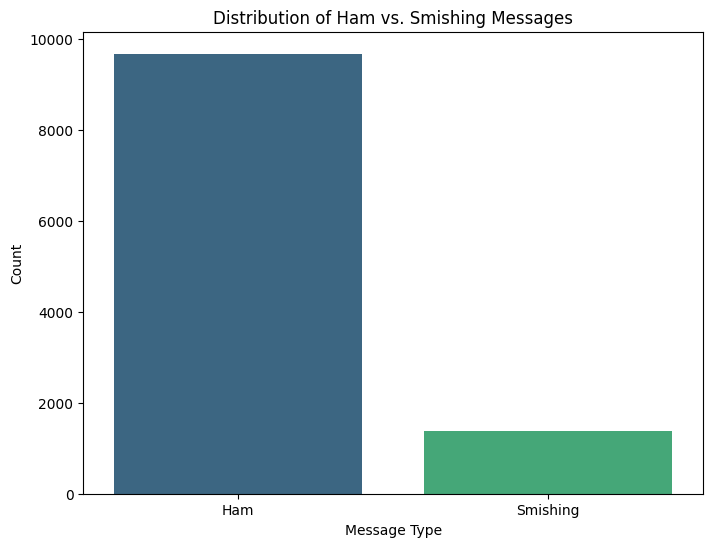

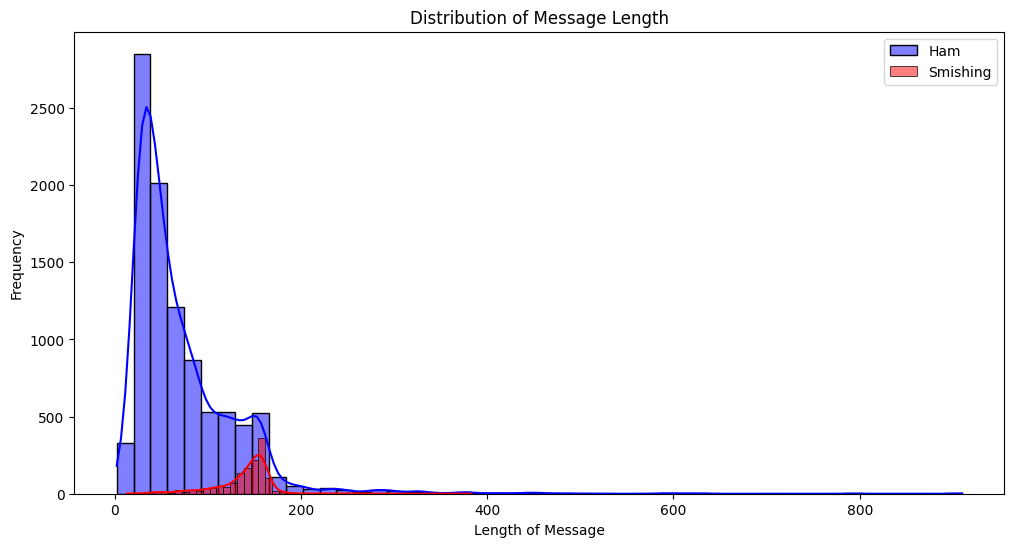


Description of text Lengths:
           count        mean        std   min    25%    50%    75%    max
target                                                                   
Ham       9669.0   71.130934  57.314972   2.0   34.0   53.0   92.0  910.0
Smishing  1385.0  139.334296  30.671415  13.0  131.0  148.0  157.0  383.0


In [ ]:
# --- Exploratory Data Analysis (EDA) ---

# 1.1. Analyze Class Distribution
print("Class Distribution:")
print(df['target'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Ham vs. Smishing Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# 1.2. Analyze Message Length
df['text_Length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 'Ham']['text_Length'], color='blue', label='Ham', kde=True, bins=50)
sns.histplot(df[df['target'] == 'Smishing']['text_Length'], color='red', label='Smishing', kde=True, bins=50)
plt.title('Distribution of Message Length')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("\nDescription of text Lengths:")
print(df.groupby('target')['text_Length'].describe())

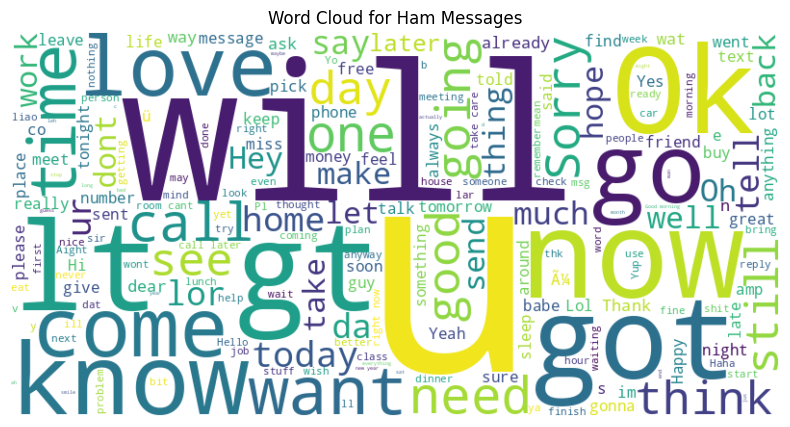

In [ ]:
# --- Textual Analysis ---

# 2.1. Word Cloud for Ham Messages
ham_text = " ".join(df[df['target'] == 'Ham']['text'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

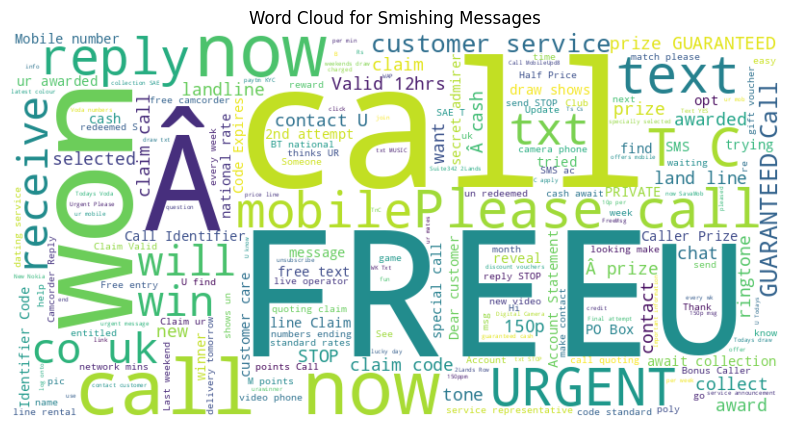

In [ ]:
# 2.2. Word Cloud for Smishing Messages
smishing_text = " ".join(df[df['target'] == 'Smishing']['text'])
wordcloud_smishing = WordCloud(width=800, height=400, background_color='white').generate(smishing_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_smishing, interpolation='bilinear')
plt.title('Word Cloud for Smishing Messages')
plt.axis('off')
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize   # Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt_tab')

def clean_text(text):
    """
    Function to clean the text data.
    - Converts to lowercase
    - Removes non-alphanumeric characters
    - Tokenizes text
    - Removes stopwords
    - Lemmatizes words
    """
    # Convert to lowercase
    text = text.lower()

    # Remove URLs, emails, and phone numbers
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'\S*@\S*\s?', '', text)

    text = re.sub(r'\d{10,}', '', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)


    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]

    return " ".join(cleaned_tokens)

# Apply the cleaning function to the 'Text' column
df['Cleaned_text'] = df['text'].apply(clean_text)

print("\nSample of Original and Cleaned text:")
print(df[['text', 'Cleaned_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Sample of Original and Cleaned text:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        Cleaned_text  
0  go jurong point crazy available bugis great wo...  
1                              ok lar joking wif oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                      dun say early hor already say  
4           nah dont think go usf life around though  


In [ ]:
df['Label_ID'] = df['target'].map({'Ham': 0, 'Smishing': 1})

In [ ]:
print("Data loaded and cleaned successfully.")
# Update the column names to 'target', 'Label_ID', and 'Cleaned_text'
print(df[['target', 'Label_ID', 'Cleaned_text']].head())

Data loaded and cleaned successfully.
     target  Label_ID                                       Cleaned_text
0       Ham         0  go jurong point crazy available bugis great wo...
1       Ham         0                              ok lar joking wif oni
2  Smishing         1  free entry wkly comp win fa cup final tkts st ...
3       Ham         0                      dun say early hor already say
4       Ham         0           nah dont think go usf life around though


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        11054 non-null  object
 1   text          11054 non-null  object
 2   url           11054 non-null  object
 3   phone         11054 non-null  object
 4   text_Length   11054 non-null  int64 
 5   Cleaned_text  11054 non-null  object
 6   Label_ID      11054 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 604.6+ KB


In [ ]:
# Advanced Feature Engineering for Smishing Detection

import pandas as pd
import numpy as np
import re
from collections import Counter
from math import log2

# Assuming your DataFrame is named df and already loaded
# Columns include: target, text, url, phone, text_Length, Cleaned_text, Label_ID

# Feature 1: Count of digits in original text
def count_digits(text):
    return len(re.findall(r'\d', text))

# Feature 2: Count of special characters in original text
def count_special_chars(text):
    return len(re.findall(r'[^a-zA-Z0-9\s]', text))

# Feature 3: Count of fully uppercase words in original text
def count_uppercase_words(text):
    return len([word for word in text.split() if word.isupper()])

# Feature 4: Presence of URL (1 or 0)
def has_url(text):
    return int(bool(re.search(r'http[s]?://|www\.', text)))

# Feature 5: Presence of phone-like number (1 or 0)
def has_phone(text):
    return int(bool(re.search(r'\d{10,}', text)))

# Feature 6: Number of words in cleaned text
def count_words(text):
    return len(text.split())

# Feature 7: Average word length in cleaned text
def avg_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Feature 8: Text entropy of cleaned text
def text_entropy(text):
    if not text:
        return 0
    prob = [freq / len(text) for freq in Counter(text).values()]
    return -sum(p * log2(p) for p in prob if p > 0)

# Apply all feature functions to DataFrame
df['num_digits'] = df['text'].apply(count_digits)
df['num_special_chars'] = df['text'].apply(count_special_chars)
df['num_uppercase_words'] = df['text'].apply(count_uppercase_words)
df['has_url_flag'] = df['text'].apply(has_url)
df['has_phone_flag'] = df['text'].apply(has_phone)
df['num_words'] = df['Cleaned_text'].apply(count_words)
df['avg_word_length'] = df['Cleaned_text'].apply(avg_word_length)
df['text_entropy'] = df['Cleaned_text'].apply(text_entropy)

# Preview final DataFrame with new features
print(df.head())

     target                                               text url phone  \
0       Ham  Go until jurong point, crazy.. Available only ...  No    No   
1       Ham                      Ok lar... Joking wif u oni...  No    No   
2  Smishing  Free entry in 2 a wkly comp to win FA Cup fina...  No    No   
3       Ham  U dun say so early hor... U c already then say...  No    No   
4       Ham  Nah I don't think he goes to usf, he lives aro...  No    No   

   text_Length                                       Cleaned_text  Label_ID  \
0          111  go jurong point crazy available bugis great wo...         0   
1           29                              ok lar joking wif oni         0   
2          155  free entry wkly comp win fa cup final tkts st ...         1   
3           49                      dun say early hor already say         0   
4           61           nah dont think go usf life around though         0   

   num_digits  num_special_chars  num_uppercase_words  has_url_flag 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-07-08 16:43:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-08 16:43:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-08 16:43:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# 1. Load and Prepare Data
texts = df['text'].astype(str).values
labels = df['target'].values

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Initial split
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# 2. Oversample Smishing class
df_train = pd.DataFrame({'text': X_train, 'label': y_train})
ham_df = df_train[df_train['label'] == 0]
smish_df = df_train[df_train['label'] == 1]

smish_oversampled = smish_df.sample(len(ham_df), replace=True, random_state=42)
df_balanced = pd.concat([ham_df, smish_oversampled]).sample(frac=1, random_state=42)

X_train = df_balanced['text'].values
y_train = df_balanced['label'].values

# 3. Tokenization and Padding
vocab_size = 5000
max_len = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# 4. Load GloVe embeddings
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(vocab_size, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
        vec = embedding_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec

# 5. Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
    return loss

# 6. Build Model
model_lstm = Sequential([
    Embedding(input_dim=num_words,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    SpatialDropout1D(0.4),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    loss=focal_loss(gamma=2.0, alpha=0.25),
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model_lstm.build(input_shape=(None, max_len))
model_lstm.summary()

# 7. Train
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_lstm.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# 8. Predict and Tune Threshold
y_pred_probs = model_lstm.predict(X_test_pad)

best_threshold = 0.0
best_f1 = 0.0

print("\n--- Threshold Tuning Report ---")
for threshold in np.arange(0.1, 0.9, 0.1):
    y_pred = (y_pred_probs > threshold).astype("int32")
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    f1 = report['Smishing']['f1-score']
    print(f"\nThreshold: {threshold:.1f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\n✅ Best Threshold: {best_threshold} with F1-score: {best_f1:.4f}")

# 9. Save Model and Tokenizer
model_lstm.save("lstm_glove_focal_model.h5")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,377 (2.36 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 500,000 (1.91 MB)

Epoch 1/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 85s 351ms/step - accuracy: 0.5538 - loss: 0.0412 - precision: 0.5512 - recall: 0.7018 - val_accuracy: 0.9386 - val_loss: 0.0124 - val_precision: 0.9200 - val_recall: 0.9558
Epoch 2/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 74s 339ms/step - accuracy: 0.9094 - loss: 0.0168 - precision: 0.9000 - recall: 0.9200 - val_accuracy: 0.9166 - val_loss: 0.0136 - val_precision: 0.9753 - val_recall: 0.8485
Epoch 3/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 82s 341ms/step - accuracy: 0.9246 - loss: 0.0141 - precision: 0.9246 - recall: 0.9244 - val_accuracy: 0.9664 - val_loss: 0.0078 - val_precision: 0.9590 - val_recall: 0.9718
Epoch 4/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 72s 331ms/step - accuracy: 0.9423 - loss: 0.0115 - precision: 0.9449 - recall: 0.9407 - val_accuracy: 0.9709 - val_loss: 0.0071 - val_precision: 0.9821 - val_recall: 0.9571
Epoch 5/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 82s 333ms/step - accuracy: 0.9506 - loss: 0.0097 - precision: 0.9541 - recall: 0.9476 - val_accuracy: 0.9761

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00      1934
    Smishing       0.99      0.96      0.97       277

    accuracy                           0.99      2211
   macro avg       0.99      0.98      0.98      2211
weighted avg       0.99      0.99      0.99      2211


Threshold: 0.8
              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00      1934
    Smishing       0.99      0.94      0.96       277

    accuracy                           0.99      2211
   macro avg       0.99      0.97      0.98      2211
weighted avg       0.99      0.99      0.99      2211


✅ Best Threshold: 0.6 with F1-score: 0.9727


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model_lstm.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1934
           1       0.95      0.97      0.96       277

    accuracy                           0.99      2211
   macro avg       0.97      0.98      0.98      2211
weighted avg       0.99      0.99      0.99      2211



70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step


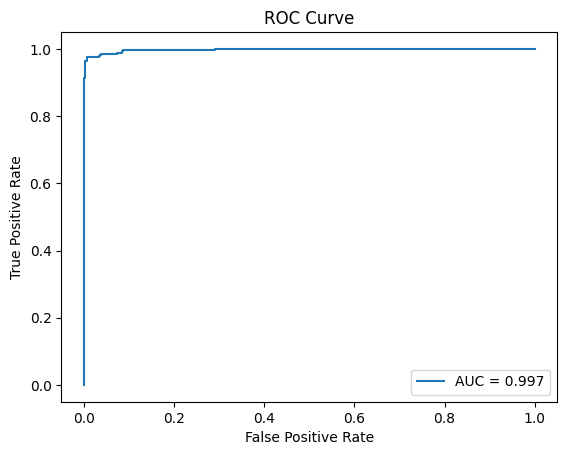

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = model_lstm.predict(X_test_pad)
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#model_lstm.save("lstm_smishing_model.h5")
#import pickle
#with open('tokenizer.pkl', 'wb') as f:
 #   pickle.dump(tokenizer, f)
#with open('label_encoder.pkl', 'wb') as f:
 #   pickle.dump(le, f)


In [ ]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.0
    Uninstalling transformers-4.53.0:
      Successfully uninstalled transformers-4.53.0


In [ ]:
# --- INSTALL DEPENDENCIES FOR COLAB ---
!pip install -q transformers datasets scikit-learn

In [ ]:
# =================== SETUP ===================
!pip install transformers datasets --quiet
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import re
import string

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# =================== LOAD & PREPARE DATA ===================
# Use the combined_df generated in previous steps
df = combined_df.copy() # Use a copy to avoid modifying the original combined_df

# Ensure the target column is numeric for the model
df['target'] = df['target'].map({'Ham': 0, 'Smishing': 1})
df.dropna(inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# =================== TOKENIZERS ===================
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Char-level tokenizer
ALL_CHARS = list(string.ascii_letters + string.digits + string.punctuation + ' ')
char2idx = {ch: idx + 1 for idx, ch in enumerate(ALL_CHARS)}  # 0 = padding
max_char_len = 256

def char_tokenize(text):
    text = text[:max_char_len]
    return [char2idx.get(c, 0) for c in text]

# =================== CUSTOM DATASET ===================
class HybridDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        # BERT tokens
        bert_inputs = bert_tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

        # Char-level tokens
        char_ids = char_tokenize(text)
        char_ids = char_ids + [0] * (max_char_len - len(char_ids))

        return {
            'input_ids': bert_inputs['input_ids'].squeeze(0),
            'attention_mask': bert_inputs['attention_mask'].squeeze(0),
            'char_ids': torch.tensor(char_ids, dtype=torch.long),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = HybridDataset(X_train, y_train)
test_dataset = HybridDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# =================== HYBRID MODEL ===================
class BERTCharCNN(nn.Module):
    def __init__(self, char_vocab_size, char_embed_dim=50, num_classes=2):
        super(BERTCharCNN, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")

        # Char-CNN
        self.char_embedding = nn.Embedding(char_vocab_size + 1, char_embed_dim, padding_idx=0)
        self.conv1 = nn.Conv1d(char_embed_dim, 64, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveMaxPool1d(1)

        # Combine
        self.fc = nn.Linear(self.bert.config.hidden_size + 64, num_classes)

    def forward(self, input_ids, attention_mask, char_ids):
        # BERT
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask).pooler_output

        # Char-CNN
        char_embed = self.char_embedding(char_ids).transpose(1, 2)  # [B, embed, T]
        char_conv = F.relu(self.conv1(char_embed))
        char_feat = self.pool(char_conv).squeeze(-1)

        # Combine
        combined = torch.cat((bert_out, char_feat), dim=1)
        logits = self.fc(combined)
        return logits

# =================== TRAINING ===================
model = BERTCharCNN(len(char2idx)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

def train(model, loader):
    model.train()
    total_loss = 0
    for batch in tqdm(loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        char_ids = batch['char_ids'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask, char_ids)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Train loss: {total_loss / len(loader):.4f}")

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            char_ids = batch['char_ids'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask, char_ids)
            preds = torch.argmax(outputs, dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# =================== RUN ===================
for epoch in range(3):
    print(f"\nEpoch {epoch+1}")
    train(model, train_loader)
    evaluate(model, test_loader)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Epoch 1


100%|██████████| 277/277 [02:56<00:00,  1.57it/s]


Train loss: 0.0636
Test Accuracy: 99.68%

Epoch 2


100%|██████████| 277/277 [03:00<00:00,  1.53it/s]


Train loss: 0.0169
Test Accuracy: 99.95%

Epoch 3


100%|██████████| 277/277 [02:59<00:00,  1.54it/s]


Train loss: 0.0047
Test Accuracy: 100.00%



Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      1938
    Smishing       0.99      1.00      0.99       273

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



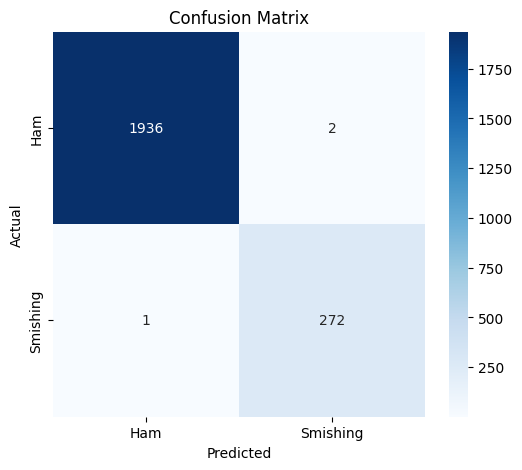

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
def get_predictions(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            char_ids = batch['char_ids'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask, char_ids)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_labels), np.array(all_preds)

# Generate predictions and true labels
true_labels, pred_labels = get_predictions(model, test_loader)

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Ham", "Smishing"]))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Smishing'],
            yticklabels=['Ham', 'Smishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ===================== INSTALLS =====================
!pip install imbalanced-learn --quiet

# ===================== IMPORTS =====================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# ===================== LOAD DATA =====================
# Use the combined_df generated in previous steps
df = combined_df.copy()
df = df[['target', 'text']] # Select only necessary columns
df['target'] = df['target'].map({'Ham': 0, 'Smishing': 1})  # Binary labels
df.dropna(inplace=True) # This should not drop any rows since combined_df has no nulls

# ===================== TRAIN-TEST SPLIT =====================
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['target'], test_size=0.2, stratify=df['target'], random_state=42
)

# ===================== TF-IDF VECTORIZATION =====================
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=10000)

# Fit on training only to avoid data leakage
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===================== HANDLE IMBALANCE WITH SMOTE =====================
# Apply SMOTE on the TF-IDF train data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("Original training label distribution:", np.bincount(y_train))
print("Resampled label distribution:", np.bincount(y_train_resampled))

Original training label distribution: [7735 1108]
Resampled label distribution: [7735 7735]


In [ ]:
tfidf = TfidfVectorizer(max_features=100)  # No stopwords or n-grams

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===================== APPLY SMOTE =====================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=["Ham", "Smishing"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# ===================== SVM (underfit) =====================
print("\n--- SVM ---")
svm_model = LinearSVC(C=0.01, max_iter=1000, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_preds = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds, target_names=["Ham", "Smishing"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))


--- Random Forest ---
Accuracy: 0.9118046132971506
              precision    recall  f1-score   support

         Ham       0.97      0.93      0.95      1934
    Smishing       0.61      0.79      0.69       277

    accuracy                           0.91      2211
   macro avg       0.79      0.86      0.82      2211
weighted avg       0.92      0.91      0.92      2211

Confusion Matrix:
 [[1796  138]
 [  57  220]]

--- SVM ---
Accuracy: 0.9317051108095884
              precision    recall  f1-score   support

         Ham       0.98      0.94      0.96      1934
    Smishing       0.67      0.90      0.77       277

    accuracy                           0.93      2211
   macro avg       0.83      0.92      0.86      2211
weighted avg       0.95      0.93      0.94      2211

Confusion Matrix:
 [[1811  123]
 [  28  249]]


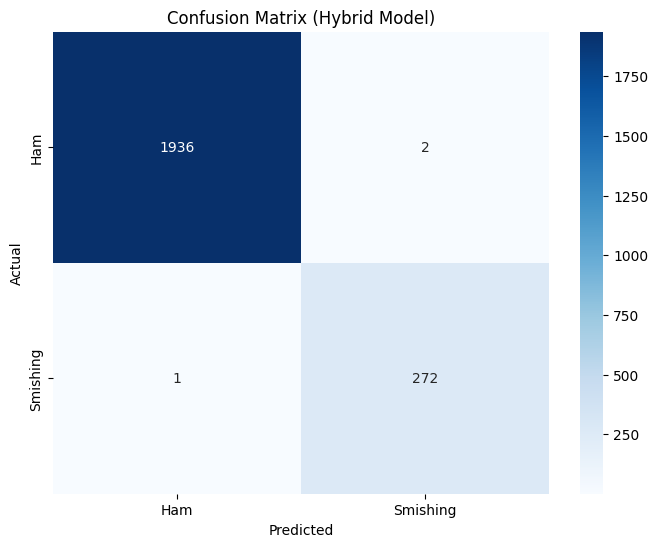

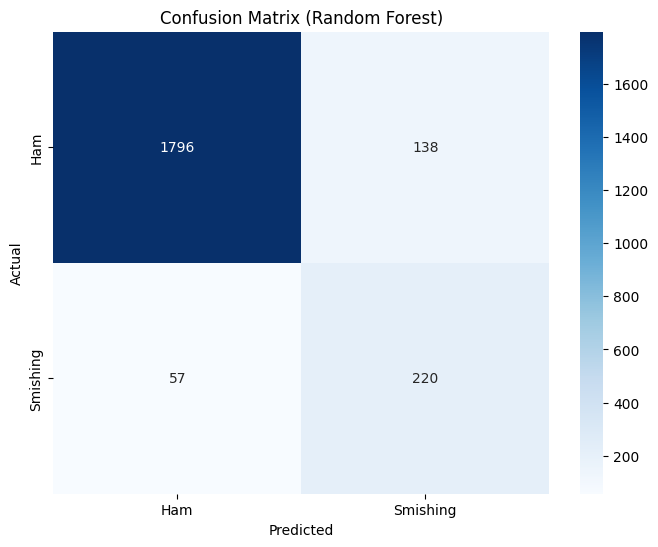

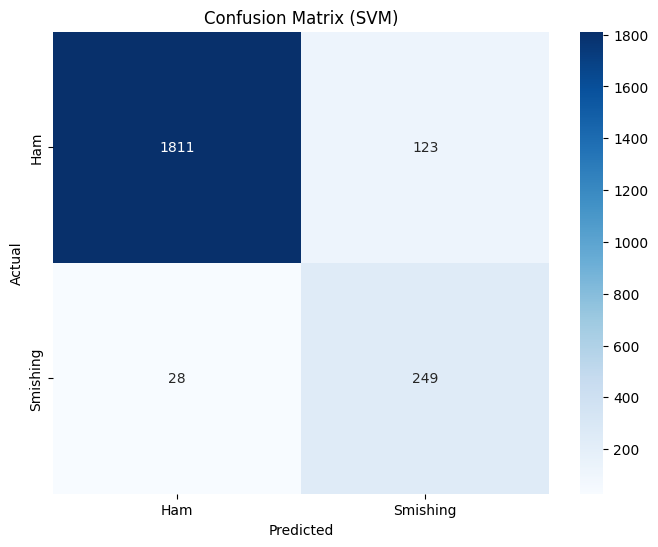

In [ ]:
# prompt: confusion matrix visualize

import matplotlib.pyplot as plt
# Visualize the Confusion Matrix for the Hybrid Model
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Smishing'],
            yticklabels=['Ham', 'Smishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Hybrid Model)")
plt.show()

# Visualize the Confusion Matrix for the Random Forest Model
cm_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Smishing'],
            yticklabels=['Ham', 'Smishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Visualize the Confusion Matrix for the SVM Model
cm_svm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Smishing'],
            yticklabels=['Ham', 'Smishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

def get_metrics(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_prob)
    }

# Random Forest
# The variable rf_preds was defined in cell MiMKeCu4Q4NS
# Calculate probabilities for ROC AUC
rf_prob = rf_model.predict_proba(X_test_tfidf)[:, 1]
rf_metrics = get_metrics(y_test, rf_preds, rf_prob)

# SVM
# The variable svm_preds was defined in cell MiMKeCu4Q4NS
# LinearSVC does not have predict_proba, use decision_function for probabilities
svm_prob = svm_model.decision_function(X_test_tfidf)
svm_metrics = get_metrics(y_test, svm_preds, svm_prob)

# LSTM
# The variable y_pred was defined in cell gJ6Q3ClyxVg6
# The variable y_probs was defined in cell YtpvX7JT0ghx and corresponds to lstm probabilities
lstm_metrics = get_metrics(y_test, y_pred.flatten(), y_probs)

# Hybrid Model (BERTCharCNN)
# The variables true_labels and pred_labels were defined in cell slFwMVeE9qDg
# Need to get probabilities for the hybrid model
def get_hybrid_probs(model, loader):
    model.eval()
    all_probs = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            char_ids = batch['char_ids'].to(device)

            outputs = model(input_ids, attention_mask, char_ids)
            probs = torch.softmax(outputs, dim=1)[:, 1] # Get probability of the positive class
            all_probs.extend(probs.cpu().numpy())
    return np.array(all_probs)

# Assuming test_loader is available from previous steps
hybrid_probs = get_hybrid_probs(model, test_loader)
hybrid_metrics = get_metrics(true_labels, pred_labels, hybrid_probs)

In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'SVM': svm_metrics,
    'LSTM': lstm_metrics,
    'BERT (CNN+Transfer)': hybrid_metrics
}).T

# Round for neat display
comparison_df = comparison_df.round(4)

print(comparison_df)

                     Accuracy  Precision  Recall  F1-score     AUC
Random Forest          0.9118     0.6145  0.7942    0.6929  0.9277
SVM                    0.9317     0.6694  0.8989    0.7673  0.9708
LSTM                   0.9851     0.9803  0.8989    0.9379  0.9949
BERT (CNN+Transfer)    0.9986     0.9927  0.9963    0.9945  1.0000


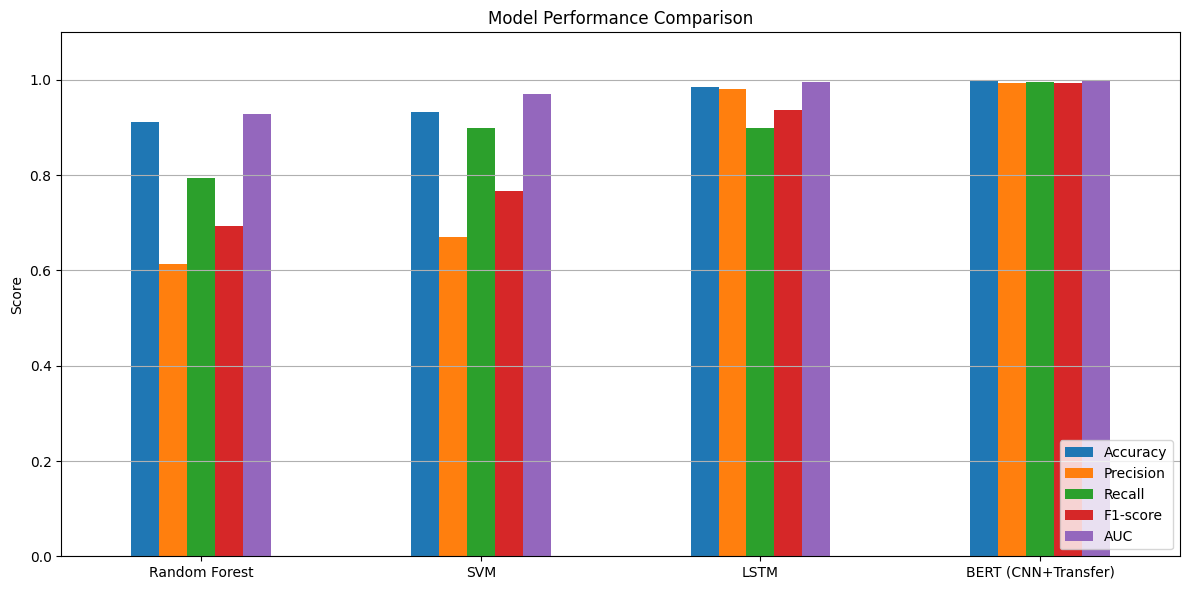

In [ ]:
import matplotlib.pyplot as plt

comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
print("🏆 Best models by each metric:\n")
print(comparison_df.idxmax())

🏆 Best models by each metric:

Accuracy     BERT (CNN+Transfer)
Precision    BERT (CNN+Transfer)
Recall       BERT (CNN+Transfer)
F1-score     BERT (CNN+Transfer)
AUC          BERT (CNN+Transfer)
dtype: object


In [ ]:
import torch
import os
import pickle
from transformers import BertTokenizer

# === Paths ===
save_dir = "hybrid_model"
os.makedirs(save_dir, exist_ok=True)

# === Save model state dict ===
torch.save(model.state_dict(), os.path.join(save_dir, "hybrid_bert_cnn.pt"))

# === Save tokenizer ===
bert_tokenizer.save_pretrained(os.path.join(save_dir, "tokenizer"))

# === Save char2idx and max_char_len ===
with open(os.path.join(save_dir, "char_config.pkl"), "wb") as f:
    pickle.dump({'char2idx': char2idx, 'max_char_len': max_char_len}, f)

print("✅ Model, tokenizer, and config saved to 'hybrid_model/'")

✅ Model, tokenizer, and config saved to 'hybrid_model/'


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
import numpy as np
import re
import string
import pickle
import os

# Define the BERTCharCNN model class again to load the saved state_dict
class BERTCharCNN(nn.Module):
    def __init__(self, char_vocab_size, char_embed_dim=50, num_classes=2):
        super(BERTCharCNN, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")

        # Char-CNN
        self.char_embedding = nn.Embedding(char_vocab_size + 1, char_embed_dim, padding_idx=0)
        self.conv1 = nn.Conv1d(char_embed_dim, 64, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveMaxPool1d(1)

        # Combine
        self.fc = nn.Linear(self.bert.config.hidden_size + 64, num_classes)

    def forward(self, input_ids, attention_mask, char_ids):
        # BERT
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask).pooler_output

        # Char-CNN
        char_embed = self.char_embedding(char_ids).transpose(1, 2)  # [B, embed, T]
        char_conv = F.relu(self.conv1(char_embed))
        char_feat = self.pool(char_conv).squeeze(-1)

        # Combine
        combined = torch.cat((bert_out, char_feat), dim=1)
        logits = self.fc(combined)
        return logits

# --- Load the saved model and components ---
save_dir = "hybrid_model"  # Directory where the model was saved
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load char_config
with open(os.path.join(save_dir, "char_config.pkl"), "rb") as f:
    char_config = pickle.load(f)
char2idx = char_config['char2idx']
max_char_len = char_config['max_char_len']
ALL_CHARS = list(string.ascii_letters + string.digits + string.punctuation + ' ') # Redefine ALL_CHARS as it was not saved

# Initialize the model with the correct char_vocab_size
model = BERTCharCNN(len(ALL_CHARS)).to(device) # Use ALL_CHARS here

# Load the saved state_dict
model.load_state_dict(torch.load(os.path.join(save_dir, "hybrid_bert_cnn.pt"), map_location=device))
model.eval() # Set the model to evaluation mode

# Load the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained(os.path.join(save_dir, "tokenizer"))

# Define the char_tokenize function again
def char_tokenize(text):
    text = text[:max_char_len]
    return [char2idx.get(c, 0) for c in text]

# --- Prediction function ---
def predict_smishing(text):
    """
    Predicts whether a given text message is smishing or not.

    Args:
        text (str): The input text message.

    Returns:
        str: 'Smishing' if predicted as smishing, 'Ham' otherwise.
    """
    # Preprocess the input text
    bert_inputs = bert_tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")
    char_ids = char_tokenize(text)
    char_ids = char_ids + [0] * (max_char_len - len(char_ids))

    # Move tensors to the correct device
    input_ids = bert_inputs['input_ids'].to(device)
    attention_mask = bert_inputs['attention_mask'].to(device)
    char_ids = torch.tensor(char_ids, dtype=torch.long).unsqueeze(0).to(device) # Add batch dimension

    # Make prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask, char_ids)
        probs = torch.softmax(outputs, dim=1)
        pred_label_id = torch.argmax(probs, dim=1).item()

    # Map label ID back to original label
    # Assuming 0 is Ham and 1 is Smishing based on previous mapping
    label_map = {0: 'Ham', 1: 'Smishing'}
    return label_map[pred_label_id]

# --- Example Usage ---
input_sms1 = "Congratulations! You have won a free iPhone! Click here to claim:"
input_sms2 = "Hey, how are you doing today?"

prediction1 = predict_smishing(input_sms1)
prediction2 = predict_smishing(input_sms2)

print(f"Input SMS 1: '{input_sms1}'")
print(f"Prediction 1: {prediction1}\n")

print(f"Input SMS 2: '{input_sms2}'")
print(f"Prediction 2: {prediction2}")

Input SMS 1: 'Congratulations! You have won a free iPhone! Click here to claim:'
Prediction 1: Smishing

Input SMS 2: 'Hey, how are you doing today?'
Prediction 2: Ham
